<a href="https://colab.research.google.com/github/yeesem/Natural-Laguage-Processing/blob/main/Chat_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import numpy as np

In [3]:
with open("train_qa.txt",'rb') as f:
  train_data = pickle.load(f)

In [4]:
with open("test_qa.txt","rb") as f:
  test_data = pickle.load(f)

In [5]:
type(test_data)

list

In [6]:
type(train_data)

list

In [7]:
len(train_data)

10000

In [8]:
len(test_data)

1000

In [13]:
#Story,Question,Ans
print(train_data[0])

print("\n")

#Story
print(train_data[0][0])

(['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.'], ['Is', 'Sandra', 'in', 'the', 'hallway', '?'], 'no')


['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.']


In [14]:
" ".join(train_data[0][1])

'Is Sandra in the hallway ?'

In [15]:
all_data = test_data + train_data

In [16]:
len(all_data)

11000

In [22]:
test = ["I","am","John","I"]
set1 = set(test)
test2 = ["I","am","Peter","I"]
set1.union(test2)

{'I', 'John', 'Peter', 'am'}

In [24]:
#Set vocab as empty set
vocab = set()

#Set - Only Return unique word
for story,question,answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [25]:
vocab.add('no')

In [26]:
vocab.add('yes')

In [27]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [28]:
vocab_len = len(vocab) + 1

In [29]:
vocab_len

38

In [30]:
#Longest story
all_story_lens = [len(data[0]) for data in all_data]

In [31]:
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [33]:
max_story_len = max(all_story_lens)
max_story_len

156

In [35]:
max_question_len = max([len(data[1]) for data in all_data])
print(max_question_len)

6


In [36]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [37]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [65]:
tokenizer.word_index.items()

print(tokenizer.word_index["down"])
print("\n")

for i,(word,count) in enumerate(tokenizer.word_index.items()):
  print(f"{word:<10}: {count}")
  if(i==9):
    break

1


down      : 1
there     : 2
.         : 3
in        : 4
kitchen   : 5
football  : 6
yes       : 7
the       : 8
milk      : 9
got       : 10


In [53]:
train_story_text = []
train_question_text = []
train_ans = []

In [55]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_ans.append(answer)

In [57]:
train_story_text[:5]

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [58]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [59]:
len(train_story_seq)

10000

In [62]:
train_story_seq[:3]

[[11, 20, 16, 8, 26, 3, 33, 32, 16, 8, 27, 3],
 [11,
  20,
  16,
  8,
  26,
  3,
  33,
  32,
  16,
  8,
  27,
  3,
  11,
  13,
  19,
  16,
  8,
  27,
  3,
  17,
  13,
  19,
  16,
  8,
  31,
  3],
 [11,
  20,
  16,
  8,
  26,
  3,
  33,
  32,
  16,
  8,
  27,
  3,
  11,
  13,
  19,
  16,
  8,
  27,
  3,
  17,
  13,
  19,
  16,
  8,
  31,
  3,
  33,
  13,
  16,
  8,
  5,
  3,
  17,
  13,
  19,
  16,
  8,
  26,
  3]]

In [75]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len = max_story_len,max_ques_len = max_question_len):

  #STORIES = X
  X = []
  #QUESTION
  Xq = []
  #Y CORRECT ANS (yes/no)
  Y = []

  for story,question,answer in data:

    #for each story
    #[23,14,...]
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in question]

    y = np.zeros(len(word_index) + 1)
    y[word_index[answer]] = 1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  #pad_sequences - make all the question and stories in the same length
  return (pad_sequences(X,maxlen = max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))


In [ ]:
input_train,question_train,answer_train = vectorize_stories(train_data)

In [72]:
input_test,question_test,answer_test = vectorize_stories(test_data)

In [73]:
answer_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
input_test

array([[ 0,  0,  0, ...,  8, 27,  3],
       [ 0,  0,  0, ...,  8, 30,  3],
       [ 0,  0,  0, ...,  8, 30,  3],
       ...,
       [ 0,  0,  0, ...,  8, 24,  3],
       [ 0,  0,  0, ...,  8, 30,  3],
       [ 0,  0,  0, ..., 24,  2,  3]], dtype=int32)

In [78]:
tokenizer.word_index['yes']

7

In [79]:
tokenizer.word_index['no']

25

In [88]:
yes = 0
no = 0

for i in range (len(test_data)):
  if train_data[i][2] == 'no':
    no+=1
  else:
    yes+=1

print(yes)
print(no)


508
492


In [81]:
sum(answer_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [89]:
from keras.models import Sequential,Model

In [92]:
from tensorflow.keras.layers import Embedding

In [93]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate

In [95]:
#PLACEHOLDER shape = (max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [96]:
vocab_size = len(vocab) + 1

In [102]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size,output_dim = 64))
#Dropout = 0.5, 50% of neuron wil be turned off during the training
#Help in preventing overfitting
input_encoder_m.add(Dropout(0.3))

#OUTPUT
#(samples,story_maxlen,embedding_dim)

In [97]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

#OUTPUT
#(samples,story_maxlen,max_question_len)

In [100]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size,output_dim = 64,input_length = max_question_len))
question_encoder.add(Dropout(0.3))

#(samples,question_maxlen,embedding_dim)

In [103]:
#ENCODED ---> ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [104]:
match = dot([input_encoded_m,question_encoded],axes = (2,2))
match = Activation('softmax')(match)

In [105]:
 response = add([match,input_encoded_c])
 response = Permute((2,1))(response)

In [107]:
answer = concatenate([response,question_encoded])

In [108]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [110]:
from keras.layers import LSTM
answer = LSTM(32)(answer)

In [111]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [112]:
answer = Activation('softmax')(answer)

In [113]:
model = Model([input_sequence,question],answer)

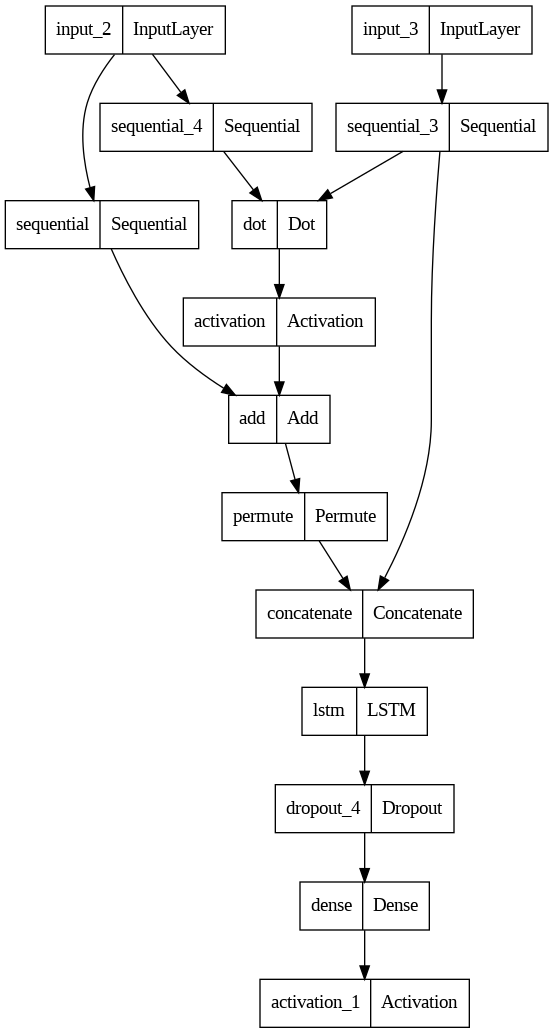

In [114]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [115]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy')

In [116]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_4 (Sequential)   (None, None, 64)             2432      ['input_2[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 6, 64)                2432      ['input_3[0][0]']             
                                                                                              